<a href="https://colab.research.google.com/github/RebatiGaire/TensorflowInPractice/blob/master/Multi_class_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [7]:
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

In [9]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
training_images = np.expand_dims(training_images, axis= 3)
testing_images = np.expand_dims(testing_images, axis= 3)

In [11]:
train_datagen = ImageDataGenerator(  
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
    

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
        train_datagen.flow(
        training_images, training_labels, batch_size=32
        ),
        steps_per_epoch=len(training_images) / 32,
        epochs=25,
        validation_data=validation_datagen.flow(
                testing_images, testing_labels, batch_size=32
                ),
        validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, verbose=1)

Epoch 1/25
858/857 [==============================] - 50s 58ms/step - loss: 2.8775 - accuracy: 0.1290 - val_loss: 2.2799 - val_accuracy: 0.2798
Epoch 2/25
858/857 [==============================] - 50s 59ms/step - loss: 2.1649 - accuracy: 0.3158 - val_loss: 1.5739 - val_accuracy: 0.4600
Epoch 3/25
858/857 [==============================] - 50s 58ms/step - loss: 1.8286 - accuracy: 0.4157 - val_loss: 1.2819 - val_accuracy: 0.5818
Epoch 4/25
858/857 [==============================] - 50s 58ms/step - loss: 1.5820 - accuracy: 0.4898 - val_loss: 1.1842 - val_accuracy: 0.5874
Epoch 5/25
858/857 [==============================] - 50s 58ms/step - loss: 1.4100 - accuracy: 0.5433 - val_loss: 0.9291 - val_accuracy: 0.6665
Epoch 6/25
858/857 [==============================] - 50s 58ms/step - loss: 1.2923 - accuracy: 0.5783 - val_loss: 1.0465 - val_accuracy: 0.6272
Epoch 7/25
858/857 [==============================] - 50s 58ms/step - loss: 1.2072 - accuracy: 0.6016 - val_loss: 0.6634 - val_accuracy:

[716.7798461914062, 0.39556607604026794]

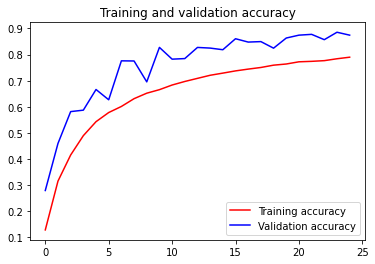

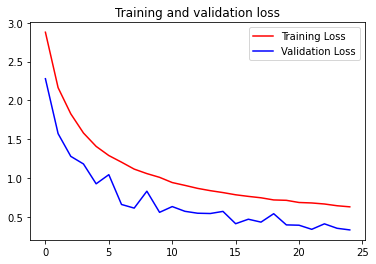

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()